In [371]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [372]:
df_train=pd.read_csv("C:/Users/Joe/Downloads/MNIST_train.csv")
df_test=pd.read_csv("C:/Users/Joe/Downloads/MNIST_test.csv")


In [373]:
df_train.head()
df_train.shape

(60000, 787)

In [374]:
df_test.shape

(10000, 787)

In [375]:
df_train.isnull().sum()

Unnamed: 0    0
index         0
labels        0
0             0
1             0
             ..
779           0
780           0
781           0
782           0
783           0
Length: 787, dtype: int64

In [376]:
missing_values=["NA","n/a","--","","N/A","na","None","none","NONE","n.a.","?"]
df_train = pd.read_csv("./MNIST_train.csv", na_values=missing_values)


In [377]:
df_test[df_test.isnull().any(axis=1)]
##

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783


In [378]:
X= df_train.to_numpy()
y=X[:,2]

In [379]:
X_test=df_test.to_numpy()
y_test=X_test[:,2]

In [380]:
X_test=X_test[:,3:]

In [381]:
X.max()

59999

In [231]:
X=X[:,3:]
X.shape
#y=X[:,2:3]
#y=df_train["labels"].to_numpy()
#y.shape
#print(y)

(60000, 784)

In [123]:
print(y)
y.shape

[5 0 4 ... 5 6 8]


(60000,)

In [124]:
X= X.reshape((60000, 28, 28))


##x_train_reshaped=np.reshape(x_train,(60000, 28, 28))

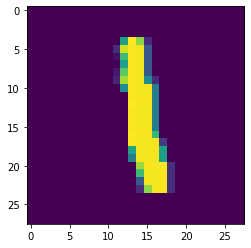

In [125]:
#img= X[0].reshape((28,28))
plt.imshow(X[6])

In [200]:
##plotting multiple data

def MultiplePlots(B):
   
    #d=0
    for i in range(B):
        plt.subplot(330 +1 +i)
        plt.imshow(X[i], cmap=plt.get_cmap('gray'))
        plt.savefig("C:/Users/Joe/Downloads/DataFromTrainSet.png" , dpi=150)
        #d +=1
    plt.show()
    
    

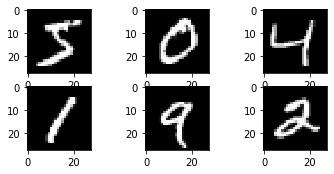

In [201]:
MultiplePlots(6)

In [336]:
##improve method to not recognize weight and height independent variables

from scipy.stats import multivariate_normal as mvn ##distribution

class GaussNB():
  def fit(self,X,y,epsilon=1e-6):
    self.likelihoods=dict()
    self.priors=dict()
    self.K=set(y.astype(int))
    for k in self.K:
      X_k=X[y==k,:]
      self.likelihoods[k]={"mean":X_k.mean(axis=0),"cov":X_k.var(axis=0)+ epsilon} ###adding eplison for not having devision of zero
      self.priors[k]=len(X_k)/len(X) ## =Nk/N , assume p(y)~1

  def predict(self,X):
    N, D= X.shape
    P_hat= np.zeros((N,len(self.K)))

    for k, l in self.likelihoods.items(): ###learning skews and mean
      P_hat[:,k]=mvn.logpdf(X,l["mean"],l["cov"], allow_singular=True)+np.log(self.priors[k]) ##mvn assume the distributtion is Normal
    return P_hat.argmax(axis=1)


In [337]:
gnb= GaussNB()

In [338]:
gnb.fit(X,y)

In [339]:
##train accuaracy
y_hat=gnb.predict(X)

In [340]:
##define accuaracy
def accuaracy(y,y_hat):
  return np.mean(y==y_hat)

In [341]:
accuaracy(y,y_hat)

0.6497833333333334

In [ ]:
###epsilon=1e-2,1e-3,1e-4,1e-5,1e-6,1e-7
Train_result=0.61,0.59,0.58,0.56,0.65,0.65
Test_result=0.65 for e=1e-6

In [346]:
###we assume to have Normal distributions
#New sigma_sub_k:
#$\sigma_k =\frac
class GaussBayes():

    
  def fit(self ,X,y,epsilon=1e-5):
    self.likelihoods =dict()
    self.priors=dict()
    self.K =set(y.astype(int))
  
    for k in self.K:
      X_k=X[y==k,:]
      N_k, D= X_k.shape
      mu_k=X_k.mean(axis=0)
    ##populate likilood
      self.likelihoods[k]={'mean': X_k.mean(axis=0),'cov':(1/(N_k-1))*np.matmul((X_k-mu_k).T, X_k-mu_k)+ epsilon*np.identity(D)}
      self.priors[k]=len(X_k)/len(X)

  def predict(self,X):

    N,D = X.shape
    P_hat = np.zeros((N,len(self.K)))
    for k, l in self.likelihoods.items():
      P_hat[:,k]= mvn.logpdf(X,l["mean"],l["cov"], allow_singular=True) + np.log(self.priors[k])
    return P_hat.argmax(axis=1)

In [347]:

#for Epsilon in [1e-2,1e-3,1e-4,1e-5,1e-6]:
    #gbayes= GaussBayes(Epsilon)
    #gbayes.fit(X,y)
    #y_hat_GB=gbayes.predict(X)
    #Accuracy= np.mean(y==y_hat_GB)
    #print(Accuracy)
    

In [348]:
gbayes=GaussBayes()

In [349]:
gbayes.fit(X,y)

In [350]:
y_hat_GB=gbayes.predict(X)

In [351]:
##define accuaracy
def accuaracy(y,y_hat_GB):
  return np.mean(y==y_hat_GB)

In [352]:
accuaracy(y,y_hat_GB)

0.8384

In [367]:
epsilon=[1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8]
train_result= [0.81,0.78,0.53,0.84,0.84,0.84,0.84]
#test_result= 0.81 for e=1e-5

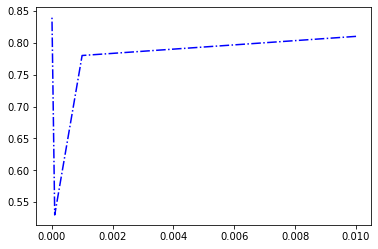

In [368]:
plt.plot(epsilon,train_result,'b-.')

In [45]:
####Classifiers
print(X[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  80 156 107 253 253 205  11   0  43 154
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 139 253 190   2   

In [70]:
##build classifier()
class KNNClassifier():
    def fit(self,X,y):
        self.X=X
        self.y=y
        
    def predict(self, X, K, epsilon=1e-3):
        N=len(X)
        y_hat= np.zeros(N)
        ## find distance and measure distance of each points
        for i in range(N):
            dist2=np.sum((self.X-X[i])**2,axis=1)
            idxt =np.argsort(dist2)[:K]
            gamma_k=1/(np.sqrt(dist2[idxt])+ epsilon)
            y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()
            
        return y_hat

In [71]:
Knn= KNNClassifier()
Knn.fit(X,y)

In [72]:
y_hat_KNN=Knn.predict(X,5)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
##define accuaracy
def accuaracy(y,y_hat_KNN):
  return np.mean(y==y_hat_KNN)

In [ ]:
accuaracy(y,y_hat_KNN)

In [369]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Compute confusion matrix
cm=confusion_matrix(y_true=y1, y_pred=y1_hat_KNN)


In [ ]:

cm = np.round (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis],2)
fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(cm, cmap=plt.cm.Pastel1)
#plt.ylabel('Actual')
#plt.xlabel('Predicted')
#plt.show(block=False)
for i in range(10):
    for j in range(10):
        plt.text(j,i, str(cm[i][j]))

plt.savefig("./ConfusionMatricsTestSetKNN.png" , dpi=150)
plt.show()